In [1]:
# import libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
# load original data into dataframe and check shape
df_ori = pd.read_csv('diabetic_data.csv')
#print(df_ori.shape)
df = df_ori.copy(deep=True)

for x in df.columns:
    print(x, df[x].unique())

encounter_id [  2278392    149190     64410 ... 443854148 443857166 443867222]
patient_nbr [  8222157  55629189  86047875 ... 140199494 120975314 175429310]
race ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
gender ['Female' 'Male' 'Unknown/Invalid']
age ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
weight ['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
admission_type_id [6 1 2 3 4 5 8 7]
discharge_disposition_id [25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]
admission_source_id [ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]
time_in_hospital [ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
payer_code ['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']
medical_specialty ['Pediatrics-Endocrinology' '?' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedic

In [3]:
df['readmitted'] = df['readmitted'].replace('>30', 0)
df['readmitted'] = df['readmitted'].replace('<30', 1) #should we code it into 1 and 2?
df['readmitted'] = df['readmitted'].replace('NO', 0)
df.readmitted.value_counts()

0    90409
1    11357
Name: readmitted, dtype: int64

In [4]:
df.drop(columns = ['patient_nbr','citoglipton','weight','examide','encounter_id', 'medical_specialty', 'payer_code'],inplace=True)
#df.drop(columns = ['citoglipton','weight','examide','encounter_id', 'medical_specialty', 'payer_code'],inplace=True)

#df = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
drop_Idx = set()
drop_Idx = drop_Idx.union(set(df[df['discharge_disposition_id'] == 11].index))
drop_Idx = drop_Idx.union(set(df['gender'][df['gender'] == 'Unknown/Invalid'].index))
drop_Idx = drop_Idx.union(set(df['diag_1'][df['diag_1']=='?'].index))
drop_Idx = drop_Idx.union(set(df['diag_2'][df['diag_2']=='?'].index))
drop_Idx = drop_Idx.union(set(df['diag_3'][df['diag_3']=='?'].index))
new_Idx = list(set(df.index) - set(drop_Idx))
df = df.iloc[new_Idx]
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,0
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,No,No,No,Yes,0
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,0
5,Caucasian,Male,[50-60),2,1,2,3,31,6,16,...,No,Steady,No,No,No,No,No,No,Yes,0


In [5]:
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 
        'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 
        'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 
        'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']

for col in keys:
    df[col] = df[col].replace('No', 0)
    df[col] = df[col].replace('Steady', 1)
    df[col] = df[col].replace('Up', 1)
    df[col] = df[col].replace('Down', 1)
    
df['change'] = df['change'].replace('Ch', 1)
df['change'] = df['change'].replace('No', 0)

df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)

df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)

df['age'] = df['age'].replace('[0-10)', 5)
df['age'] = df['age'].replace('[10-20)', 15)
df['age'] = df['age'].replace('[20-30)', 25)
df['age'] = df['age'].replace('[30-40)', 35)
df['age'] = df['age'].replace('[40-50)', 45)
df['age'] = df['age'].replace('[50-60)', 55)
df['age'] = df['age'].replace('[60-70)', 65)
df['age'] = df['age'].replace('[70-80)', 75)
df['age'] = df['age'].replace('[80-90)', 85)
df['age'] = df['age'].replace('[90-100)', 95)

df['race'] = df['race'].replace('Caucasian', 0)
df['race'] = df['race'].replace('AfricanAmerican', 1)
df['race'] = df['race'].replace('Hispanic', 2)
df['race'] = df['race'].replace('Asian', 3)
df['race'] = df['race'].replace('Other', 4)

df = df.replace('?', -1)
#df.head()

for col in df:
    print(col, " : ")
    print(df[col].unique())
    

race  : 
[ 0  1 -1  4  3  2]
gender  : 
[0 1]
age  : 
[15 25 35 45 55 65 75 85 95  5]
admission_type_id  : 
[1 2 3 6 4 5 8 7]
discharge_disposition_id  : 
[ 1  3  6  2  5  7 25 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28 19
 27]
admission_source_id  : 
[ 7  2  4  1  5 20  6  3 17  8  9 14 10 22 11 25 13]
time_in_hospital  : 
[ 3  2  1  4  5 13 12  9  7 10  6 11  8 14]
num_lab_procedures  : 
[ 59  11  44  51  31  70  73  68  33  47  62  60  55  49  75  45  29  35
  42  66  36  19  64  25  53  52  87  27  37  41  28  48  10   2  65  67
  40  54  58  57  43  32  83  34  39  69  38  72  22  96  46  78  56  61
  88  50   1  18  82   9  63  24  71  77  81  76  90  93   3 103  13  80
  85  16  15  12  30  23  17  21  79  26   5  95  97  84  14  74 105  86
  98  20   6  94   8 102   7  89  91  92   4 101  99 100 114 113 111 129
 107 108 106 104 109 120 132 121 126 118]
num_procedures  : 
[0 5 1 6 2 3 4]
num_medications  : 
[18 13 16  8 21 12 28 17 11 15 31  2 23 19  7 20 14 10 22  9 25  4 

In [6]:
# df.loc[(df.diag_1.str.contains('V')),'diag_1']=0
# df.loc[(df.diag_1.str.contains('E')),'diag_1']=0

# df.loc[(df.diag_2.str.contains('V')),'diag_2']=0
# df.loc[(df.diag_2.str.contains('E')),'diag_2']=0

# df.loc[(df.diag_3.str.contains('V')),'diag_3']=0
# df.loc[(df.diag_3.str.contains('E')),'diag_3']=0

# for i in df['diag_1']:
#     b = 'V' in str(i)
#     c = 'E' in str(i)
#     if b or c:
#         print(str(i))
        
        
# for i in df['diag_2']:
#     b = 'V' in str(i)
#     c = 'E' in str(i)
#     if b or c:
#         print(str(i))
        
        
# for i in df['diag_3']:
#     b = 'V' in str(i)
#     c = 'E' in str(i)
#     if b or c:
#         print(str(i))

diags = ['diag_1','diag_2','diag_3']
    
def detection(value):
    if value[0]== "V" or value[0] == 'E':
        value = '0'
        return value # from new york united healthcare
    else:
        return value
    
for f in diags:
    for i in df[f].index:
        df[f].at[i] = detection(df[f].at[i])
        
for i in df['diag_1']:
    b = 'V' in str(i)
    c = 'E' in str(i)
    if b or c:
        print(str(i))
        
#print(df['diag_1'].unique())
        
#print(df['diag_2'].unique())
        
#print(df['diag_3'].unique())


    

In [7]:
df['service_utilization'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']
print("geelo ", df.columns)
df.drop(['number_outpatient', 'number_emergency', 'number_inpatient'], axis=1, inplace=True)
df.columns

geelo  Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'service_utilization'],
      dtype='object')


Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'service_utilization'],
      dtype='object')

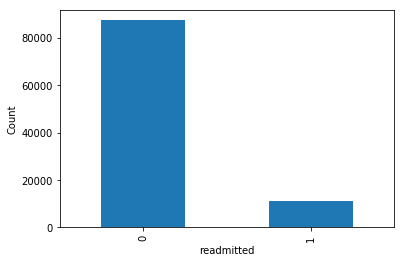

(98601, 95)


In [8]:
#df_age = pd.get_dummies(df['age'])
#df_race = pd.get_dummies(df['race'])
#df_gender = pd.get_dummies(df['gender'])
#df_change = pd.get_dummies(df['change'])
#df_diabetesMed = pd.get_dummies(df['diabetesMed'])

df_max_glu_serum = pd.get_dummies(df['max_glu_serum'])
df_A1Cresult = pd.get_dummies(df['A1Cresult'])
df_insulin = pd.get_dummies(df['insulin'])
df_discharge_disposition_id = pd.get_dummies(df['discharge_disposition_id'])
df_admission_source_id = pd.get_dummies(df['admission_source_id'])
df_admission_type_id = pd.get_dummies(df['admission_type_id'])

#print(df_max_glu_serum)
#df = pd.concat([df,df_max_glu_serum])
#df.drop(['max_glu_serum'], axis=1, inplace=True)             
df = pd.concat([df,df_max_glu_serum, df_A1Cresult, 
                df_insulin, df_discharge_disposition_id, 
                df_admission_source_id, df_admission_type_id], axis=1)
df.drop([ 'max_glu_serum', 'A1Cresult', 'insulin','discharge_disposition_id', 'admission_source_id', 
                  'admission_type_id'], axis=1, inplace=True)
#before
df.groupby('readmitted').size().plot(kind='bar')
plt.ylabel('Count')
plt.show()

print(df.shape)
# df = df['readmitted' == 1 or 'readmitted' == 0]
#df.readmitted = np.where(df.readmitted=2, 0, df.readmitted)
#after
# df.groupby('readmitted').size().plot(kind='bar')
# plt.ylabel('Count')
# plt.title("AFTER CHANGE")
# plt.show()
# #print(df.iloc[0])
# #df.head()
# df.head()

In [9]:
from sklearn.model_selection import train_test_split

feature_col_names = df.columns
#print(df.columns)
x = df[feature_col_names]
#x = x.drop('readmitted', axis=1)
x = df.loc[:, df.columns != 'readmitted']
y = df['readmitted']
#print(x.columns, y)
#print(y.unique())
print(x, y)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=1)

        race  gender  age  time_in_hospital  num_lab_procedures  \
1          0       0   15                 3                  59   
2          1       0   25                 2                  11   
3          0       1   35                 2                  44   
4          0       1   45                 1                  51   
5          0       1   55                 3                  31   
...      ...     ...  ...               ...                 ...   
101761     1       1   75                 3                  51   
101762     1       0   85                 5                  33   
101763     0       1   75                 1                  53   
101764     0       0   85                10                  45   
101765     0       1   75                 6                  13   

        num_procedures  num_medications  diag_1  diag_2 diag_3  ...  22  25  \
1                    0               18     276  250.01    255  ...   0   0   
2                    5               

In [10]:
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_sample(x.as_matrix(), y)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(x.columns))
X_train, X_dev, Y_train, Y_dev = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

Original dataset shape Counter({0: 87351, 1: 11250})


/Users/davisbui/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


New dataset shape Counter({0: 87351, 1: 87351})


## Decision Tree

### maxDepth vs minLeaf

In [11]:
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score

maxD = list(range(1,60,10))  
minL = list(range(1,60,10))  
va_auc = np.zeros((len(maxD),len(minL)))
va_acc = np.zeros((len(maxD),len(minL)))

for i,d in enumerate(maxD):
    for j,l in enumerate(minL):
        clf = tree.DecisionTreeClassifier(min_samples_leaf= l, max_depth= d,criterion = "entropy", min_samples_split=10)
        clf.fit(X_train, Y_train)

        preds = clf.predict(X_dev)
        fpr, tpr, thresholds = metrics.roc_curve(Y_dev, preds, pos_label=1)
        va_auc[i][j] = metrics.auc(fpr, tpr)
        va_acc[i][j]= accuracy_score(Y_dev, preds)

#### validation auc

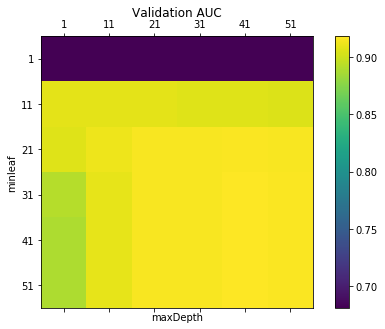

[[0.68108488 0.68108488 0.68108488 0.68108488 0.68108488 0.68108488]
 [0.90850505 0.90882101 0.90853868 0.90677066 0.90671858 0.9060886 ]
 [0.90649404 0.91236712 0.91584219 0.91582077 0.91738759 0.91636725]
 [0.89237068 0.90944309 0.9159881  0.91657659 0.91849233 0.91750207]
 [0.88930753 0.90970407 0.91610322 0.91646146 0.91814566 0.91750207]
 [0.88947957 0.90976066 0.91613201 0.91637447 0.91849233 0.91750207]]


In [12]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(va_auc, interpolation='nearest')
f.colorbar(cax)
ax.set_xticklabels(['']+maxD)
ax.set_yticklabels(['']+minL)
ax.set_title("Validation AUC")
ax.set_xlabel('maxDepth')
ax.set_ylabel('minleaf')
plt.show()
print(va_auc)

#### validation accuracy 

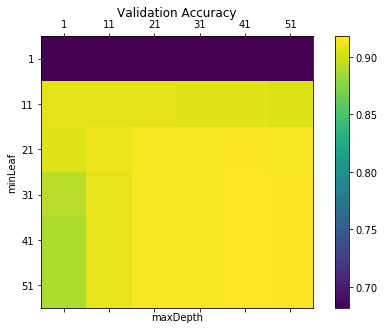

[[0.68172061 0.68172061 0.68172061 0.68172061 0.68172061 0.68172061]
 [0.90821671 0.90853152 0.90824533 0.90647091 0.90641367 0.90578404]
 [0.90629919 0.91210898 0.91551472 0.91545749 0.91700295 0.91597264]
 [0.89233279 0.90924702 0.91568644 0.91623022 0.91811912 0.91711743]
 [0.8892991  0.90950459 0.91580092 0.91611574 0.91777568 0.91711743]
 [0.88947082 0.90956183 0.91582954 0.91602988 0.91811912 0.91711743]]


In [13]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(va_acc, interpolation='nearest')
f.colorbar(cax)
ax.set_xticklabels(['']+maxD)
ax.set_yticklabels(['']+minL)
ax.set_title("Validation Accuracy")
ax.set_xlabel('maxDepth')
ax.set_ylabel('minLeaf')
plt.show()
print(va_acc)

#### default decision tree learner

In [14]:
from sklearn import tree
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
clf = tree.DecisionTreeClassifier(criterion = "entropy")
clf.fit(X_train, Y_train)
preds = clf.predict(X_dev)
print("ACCURACY " , accuracy_score(Y_dev, preds))
fpr, tpr, thresholds = metrics.roc_curve(Y_dev, preds, pos_label=1)
print("AUC ", metrics.auc(fpr, tpr))

ACCURACY  0.8828310580693168
AUC  0.8827834421137737


#### testing different max_depth

In [15]:
from sklearn import tree
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score

D = list(range(1,150,10))
test_accuracy = []
test_auc = []

for d in D:
    clf = tree.DecisionTreeClassifier(criterion = "entropy", max_depth= d)
    clf.fit(X_train, Y_train)
    preds = clf.predict(X_dev)
    test_accuracy.append( accuracy_score(Y_dev, preds))
    fpr, tpr, thresholds = metrics.roc_curve(Y_dev, preds, pos_label=1)
    test_auc.append(metrics.auc(fpr, tpr))

##### validation auc

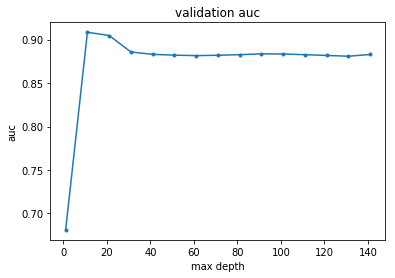

[0.681084884849994, 0.9085037633990133, 0.9047338278741153, 0.8857903193627515, 0.88306997067331, 0.8821531438287985, 0.8816066095475376, 0.8820305932464539, 0.8826983871899732, 0.8836145685744417, 0.8834732406748028, 0.8826718643521619, 0.8818329923709768, 0.8808838335482659, 0.8829587156417196]


In [16]:
plt.plot(D, test_auc, marker = '.')
plt.xlabel("max depth")
plt.ylabel("auc")
plt.title('validation auc')
plt.show()
print(test_auc)

##### validation accuracy

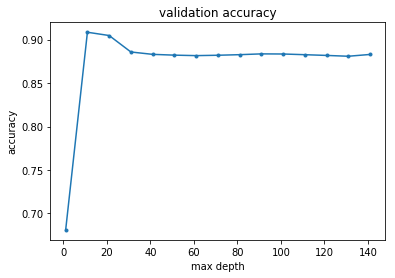

[0.6817206147505795, 0.9082167081651927, 0.9045533900002862, 0.8858075040783034, 0.8831172548009502, 0.8822014252597236, 0.8816576514696202, 0.8820869465670702, 0.8827451990498268, 0.8836610285910534, 0.8835179302252368, 0.8827165793766635, 0.8818866088549269, 0.8809421596405369, 0.8830027761082968]


In [17]:
plt.plot(D, test_auc, marker = '.')
plt.xlabel("max depth")
plt.ylabel("accuracy")
plt.title('validation accuracy')
plt.show()
print(test_accuracy)

#### testing different min_samples_leaf

In [38]:
from sklearn import tree
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score

M = list(range(1,150,10))
test_accuracy = []
test_auc = []

for m in M:
    clf = tree.DecisionTreeClassifier(criterion = "entropy", min_samples_leaf =m)
    clf.fit(X_train, Y_train)
    preds = clf.predict(X_dev)
    test_accuracy.append( accuracy_score(Y_dev, preds))
    fpr, tpr, thresholds = metrics.roc_curve(Y_dev, preds, pos_label=1)
    test_auc.append(metrics.auc(fpr, tpr))

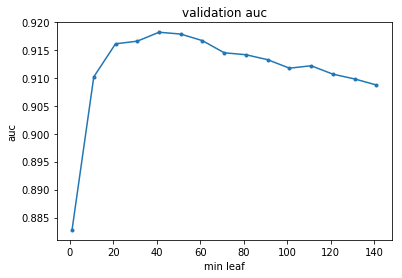

[0.8827805375435799, 0.9101639341383319, 0.9160741201491696, 0.9165481270014257, 0.9181456569903185, 0.9178199601460859, 0.9166385503835034, 0.9144727452498171, 0.914121875463904, 0.9132318352111808, 0.9117170420598932, 0.9121487712793269, 0.9106443054887288, 0.9097892380304218, 0.9087055286385249]


In [40]:
plt.plot(M, test_auc, marker = '.')
plt.xlabel("min leaf")
plt.ylabel("auc")
plt.title('validation auc')
plt.show()
print(test_auc)

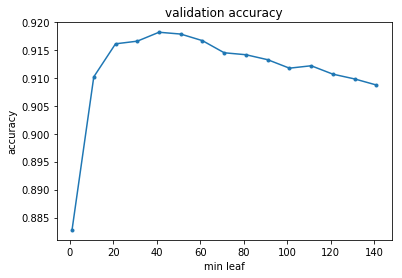

[0.8828310580693168, 0.909962508228156, 0.9157723018803126, 0.9162015969777625, 0.9177756790017458, 0.9174322429237858, 0.9162302166509259, 0.9140551214905126, 0.9137116854125525, 0.912795855871326, 0.9112790131936693, 0.9117083082911193, 0.9101914656134626, 0.9093328754185627, 0.9082453278383561]


In [41]:
plt.plot(M, test_auc, marker = '.')
plt.xlabel("min leaf")
plt.ylabel("accuracy")
plt.title('validation accuracy')
plt.show()
print(test_accuracy)

#### best decision tree learner

In [44]:
from sklearn import tree
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
clf = tree.DecisionTreeClassifier(criterion = "entropy", min_samples_leaf = 40 )
clf.fit(X_train, Y_train)
preds = clf.predict(X_dev)
print("ACCURACY " , accuracy_score(Y_dev, preds))
fpr, tpr, thresholds = metrics.roc_curve(Y_dev, preds, pos_label=1)
print("AUC ", metrics.auc(fpr, tpr))

ACCURACY  0.9177756790017458
AUC  0.91814597972034


## Random Forest

### maxLeaf vs maxDepth

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score

maxLeaf = list(range(2,25,5))  
maxDepth = list(range(1,25,5))  

va_auc = np.zeros((len(maxLeaf),len(maxDepth)))
va_acc = np.zeros((len(maxLeaf),len(maxDepth)))

for i,leaf in enumerate(maxLeaf):
    for j,depth in enumerate(maxDepth):
        clf = RandomForestClassifier(max_depth=depth,max_leaf_nodes=leaf, random_state=0)
        clf.fit(X_train, Y_train)

        preds = clf.predict(X_dev)
        fpr, tpr, thresholds = metrics.roc_curve(Y_dev, preds, pos_label=1)
        va_auc[i][j] = metrics.auc(fpr, tpr)
        va_acc[i][j]= accuracy_score(Y_dev, preds)

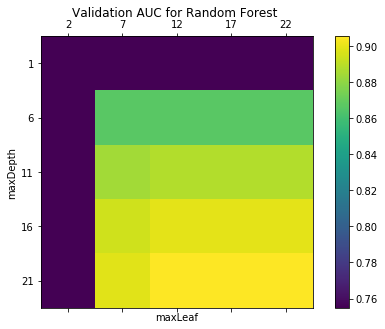

In [20]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(va_auc, interpolation='nearest')
f.colorbar(cax)
ax.set_xticklabels(['']+maxLeaf)
ax.set_yticklabels(['']+maxDepth)
ax.set_title("Validation AUC for Random Forest ")
ax.set_xlabel('maxLeaf')
ax.set_ylabel('maxDepth')
plt.show()

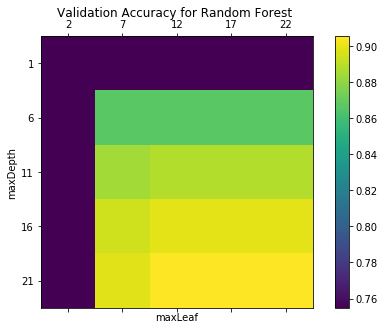

In [21]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(va_auc, interpolation='nearest')
f.colorbar(cax)
ax.set_xticklabels(['']+maxLeaf)
ax.set_yticklabels(['']+maxDepth)
ax.set_title("Validation Accuracy for Random Forest ")
ax.set_xlabel('maxLeaf')
ax.set_ylabel('maxDepth')
plt.show()

### n_estimators(number of trees in the forest)  vs maxDepth 

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score

estimators = list(range(100,125,5))  
maxDepth = list(range(1,60,10))  

va_auc = np.zeros((len(estimators),len(maxDepth)))
va_acc = np.zeros((len(estimators),len(maxDepth)))

for i,n in enumerate(estimators):
    for j,depth in enumerate(maxDepth):
        clf = RandomForestClassifier(max_depth=depth,n_estimators = n, random_state=0)
        clf.fit(X_train, Y_train)

        preds = clf.predict(X_dev)
        fpr, tpr, thresholds = metrics.roc_curve(Y_dev, preds, pos_label=1)
        va_auc[i][j] = metrics.auc(fpr, tpr)
        va_acc[i][j]= accuracy_score(Y_dev, preds)

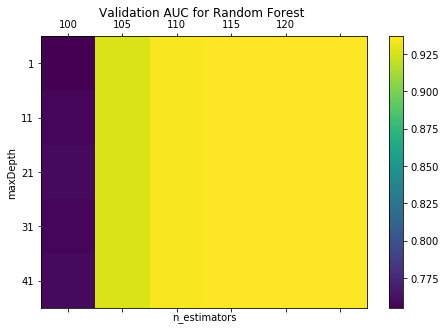

[[0.75487059 0.92662181 0.93545385 0.93641823 0.93667404 0.93687455]
 [0.75707196 0.92659335 0.93534001 0.93650361 0.93673096 0.93693179]
 [0.75937457 0.92687826 0.93534001 0.93647483 0.93667469 0.93696025]
 [0.75731776 0.92684981 0.93536847 0.93644637 0.93670283 0.93690301]
 [0.75950331 0.92696429 0.93539693 0.93644637 0.93673161 0.93678917]]


In [23]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(va_auc, interpolation='nearest')
f.colorbar(cax)
ax.set_xticklabels(['']+estimators )
ax.set_yticklabels(['']+maxDepth)
ax.set_title("Validation AUC for Random Forest ")
ax.set_xlabel('n_estimators')
ax.set_ylabel('maxDepth')
plt.show()
print(va_auc)

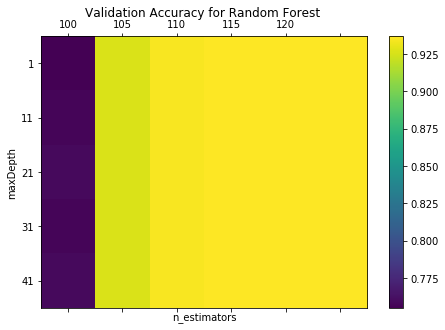

[[0.75498698 0.92621848 0.93509058 0.93606365 0.93632123 0.93652156]
 [0.75719069 0.92618986 0.9349761  0.93614951 0.93637847 0.9365788 ]
 [0.75950889 0.92647606 0.9349761  0.93612089 0.93632123 0.93660742]
 [0.75744827 0.92644744 0.93500472 0.93609227 0.93634985 0.93655018]
 [0.75965198 0.92656192 0.93503334 0.93609227 0.93637847 0.93643571]]


In [24]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(va_auc, interpolation='nearest')
f.colorbar(cax)
ax.set_xticklabels(['']+estimators)
ax.set_yticklabels(['']+maxDepth)
ax.set_title("Validation Accuracy for Random Forest ")
ax.set_xlabel('n_estimators')
ax.set_ylabel('maxDepth')
plt.show()
print(va_acc)

### testing different max depth values

#### default max_depth = none

In [25]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, Y_train)
preds = clf.predict(X_dev)
print("ACCURACY " , accuracy_score(Y_dev, preds))
fpr, tpr, thresholds = metrics.roc_curve(Y_dev, preds, pos_label=1)
print("AUC ", metrics.auc(fpr, tpr))

ACCURACY  0.9365215649237286
AUC  0.936874227307332


In [26]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score

D = list(range(10,110,10))
test_accuracy = []
test_auc = []

for d in D:
    clf = RandomForestClassifier(max_depth=d, random_state=0)
    clf.fit(X_train, Y_train)
    preds = clf.predict(X_dev)
    test_accuracy.append( accuracy_score(Y_dev, preds))
    fpr, tpr, thresholds = metrics.roc_curve(Y_dev, preds, pos_label=1)
    test_auc.append(metrics.auc(fpr, tpr))

#### validation auc

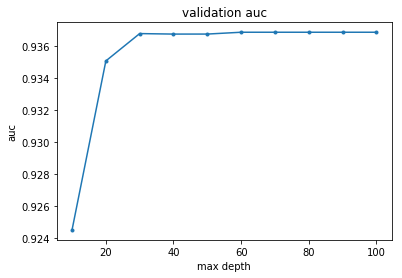

[0.9245339585178491, 0.9350835556872191, 0.9367904633036175, 0.9367594222455046, 0.9367603904355692, 0.936874227307332, 0.936874227307332, 0.936874227307332, 0.936874227307332, 0.936874227307332]


In [27]:
plt.plot(D, test_auc, marker = '.')
plt.xlabel("max depth")
plt.ylabel("auc")
plt.title('validation auc')
plt.show()
print(test_auc)

#### validation accuracy

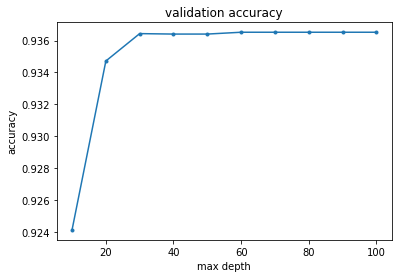

[0.9241292464440056, 0.9347185255144386, 0.9364357059042385, 0.9364070862310753, 0.9364070862310753, 0.9365215649237286, 0.9365215649237286, 0.9365215649237286, 0.9365215649237286, 0.9365215649237286]


In [28]:
plt.plot(D, test_accuracy, marker = '.')
plt.xlabel("max depth")
plt.ylabel("accuracy")
plt.title('validation accuracy')
plt.show()
print(test_accuracy)

### testing different n_estimators values

#### default n_estimators

In [29]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, Y_train)
preds = clf.predict(X_dev)
print("ACCURACY " , accuracy_score(Y_dev, preds))
fpr, tpr, thresholds = metrics.roc_curve(Y_dev, preds, pos_label=1)
print("AUC ", metrics.auc(fpr, tpr))

ACCURACY  0.9365215649237286
AUC  0.936874227307332


In [30]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score

N = list(range(100,200,10))
test_accuracy = []
test_auc = []

for n in N:
    clf = RandomForestClassifier(n_estimators = n, random_state=0)
    clf.fit(X_train, Y_train)
    preds = clf.predict(X_dev)
    test_accuracy.append( accuracy_score(Y_dev, preds))
    fpr, tpr, thresholds = metrics.roc_curve(Y_dev, preds, pos_label=1)
    test_auc.append(metrics.auc(fpr, tpr))

#### validation auc

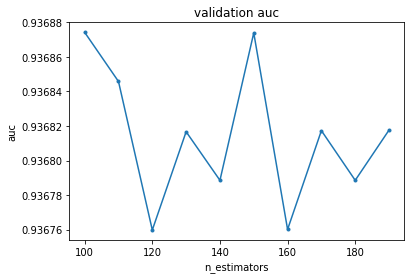

[0.936874227307332, 0.9368457680893914, 0.936759744975526, 0.9368166634114075, 0.9367885269234884, 0.9368739045773105, 0.9367600677055476, 0.9368173088714505, 0.9367885269234884, 0.9368176316014721]


In [31]:
plt.plot(N, test_auc, marker = '.')
plt.xlabel("n_estimators")
plt.ylabel("auc")
plt.title('validation auc')
plt.show()
print(test_auc)

#### validation accuracy

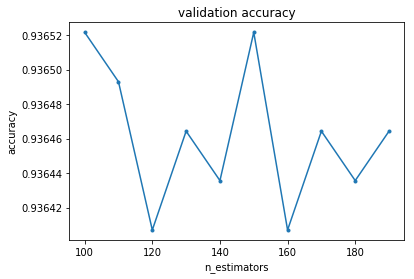

[0.9365215649237286, 0.9364929452505653, 0.9364070862310753, 0.9364643255774019, 0.9364357059042385, 0.9365215649237286, 0.9364070862310753, 0.9364643255774019, 0.9364357059042385, 0.9364643255774019]


In [32]:
plt.plot(N, test_accuracy, marker = '.')
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.title('validation accuracy')
plt.show()
print(test_accuracy)

#### best random forest learner

In [34]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
clf = RandomForestClassifier(random_state=0, n_estimators = 150)
clf.fit(X_train, Y_train)
preds = clf.predict(X_dev)
print("ACCURACY " , accuracy_score(Y_dev, preds))
fpr, tpr, thresholds = metrics.roc_curve(Y_dev, preds, pos_label=1)
print("AUC ", metrics.auc(fpr, tpr))

ACCURACY  0.9365215649237286
AUC  0.9368739045773105
